In [ ]:
pip install ray

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.2/56.2 MB 8.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 149.6/149.6 kB 12.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 18.8 MB/s eta 0:00:00
  Attempting uninstall: grpcio
    Found existing installation: grpcio 1.54.0
    Uninstalling grpcio-1.54.0:
      Successfully uninstalled grpcio-1.54.0


In [ ]:
import ray

In [ ]:
import time

In [ ]:
ray.init()

2023-06-23 14:17:14,660	INFO worker.py:1636 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.5.1


In [ ]:
# ray.shutdown()

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving doct.csv to doct.csv


In [ ]:
# ray.shutdown()

#Reading the CSV using raw.data and get it into pandas DataFrame

In [ ]:
a=ray.data.read_csv('doct.csv')
type(a)
for batch in a.iter_batches(batch_size=a.count(),batch_format='pandas'):
  data=batch

2023-06-23 14:22:09,887	WARNING dataset.py:253 -- Important: Ray Data requires schemas for all datasets in Ray 2.5. This means that standalone Python objects are no longer supported. In addition, the default batch format is fixed to NumPy. To revert to legacy behavior temporarily, set the environment variable RAY_DATA_STRICT_MODE=0 on all cluster processes.

Learn more here: https://docs.ray.io/en/master/data/faq.html#migrating-to-strict-mode


Read progress 0:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
data.head()

,,text
0,0,__label__2 Stuning even for the non-gamer: Thi...
1,1,__label__2 The best soundtrack ever to anythin...
2,2,__label__2 Amazing!: This soundtrack is my fav...
3,3,__label__2 Excellent Soundtrack: I truly like ...
4,4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


##Dividing the dataset into 9 list of texts to run on different computers

In [ ]:
length1=len(data)
data1=[]
data2=[]
data3=[]
data4=[]
data5=[]
data6=[]
data7=[]
data8=[]
data9=[]
for i in range(len(data)):
    if i%9==0:
        data1.append(data['text'][i])
    elif i%9==1:
        data2.append(data['text'][i])
    elif i%9==2:
        data3.append(data['text'][i])
    elif i%9==3:
        data4.append(data['text'][i])
    elif i%9==4:
        data5.append(data['text'][i])
    elif i%9==5:
        data6.append(data['text'][i])
    elif i%9==6:
        data7.append(data['text'][i])
    elif i%9==7:
        data8.append(data['text'][i])
    elif i%9==8:
        data9.append(data['text'][i])

##The function will be able to derive the labels from the text

In [ ]:
@ray.remote
def f1(data):
  labels1=[]
  for i in range(len(data)):
    str1=""
    for j in range(0,len(data[i])):
      if data[i][j]!=' ':
        str1+=(data[i][j])
      else:
        break
    labels1.append(str1)
  return labels1

###The 9 data lists are processed for the same

In [ ]:
d11=f1.remote(data1)
d1=ray.get(d11)
len(d1)

4000

In [ ]:
d11=f1.remote(data2)
d2=ray.get(d11)
len(d2)

4000

In [ ]:
d11=f1.remote(data3)
d3=ray.get(d11)
len(d3)

4000

In [ ]:
d11=f1.remote(data4)
d4=ray.get(d11)
len(d4)

4000

In [ ]:
d11=f1.remote(data5)
d5=ray.get(d11)
len(d5)

4000

In [ ]:
d11=f1.remote(data6)
d6=ray.get(d11)
len(d6)

4000

In [ ]:
d11=f1.remote(data7)
d7=ray.get(d11)
len(d7)

4000

In [ ]:
d11=f1.remote(data8)
d8=ray.get(d11)
len(d8)

4000

In [ ]:
d11=f1.remote(data9)
d9=ray.get(d11)
len(d9)

4000

In [ ]:
for i in range(5):
  print(d9[i])

__label__2
__label__2
__label__1
__label__1
__label__2


##This can be used to extract from txt file

In [ ]:
# ab=ray.data.read_text('sample.txt')
# for batch in ab.iter_batches(batch_size=18,batch_format='pandas'):
#   data=batch
# print(ab)

In [ ]:
a.count()

36000

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
len(data)

36000

In [ ]:
type(data)

pandas.core.frame.DataFrame

In [ ]:
data.head()

,,text
0,0,__label__2 Stuning even for the non-gamer: Thi...
1,1,__label__2 The best soundtrack ever to anythin...
2,2,__label__2 Amazing!: This soundtrack is my fav...
3,3,__label__2 Excellent Soundtrack: I truly like ...
4,4,"__label__2 Remember, Pull Your Jaw Off The Flo..."


In [ ]:
import numpy as np

In [ ]:
len(data1)

4000

###This function extracts label and brief description

In [ ]:
@ray.remote
def summar(data1):
  summarization1=[]
  for i in range(len(data1)):
    str1=""
    j=len(data1[i])
    for k in range(0,j):
      if data1[i][k]!=':':
        str1+=data1[i][k]
      else:
        break
    summarization1.append(str1)
  return summarization1

###The 9 data lists are processed for the same

In [ ]:
s1=summar.remote(data1)
s_real_1=ray.get(s1)
len(s_real_1)

4000

In [ ]:
s1=summar.remote(data2)
s_real_2=ray.get(s1)

In [ ]:
s1=summar.remote(data3)
s_real_3=ray.get(s1)
len(s_real_3)

4000

In [ ]:
s1=summar.remote(data4)
s_real_4=ray.get(s1)
len(s_real_4)

4000

In [ ]:
s1=summar.remote(data5)
s_real_5=ray.get(s1)
len(s_real_5)

4000

In [ ]:
s1=summar.remote(data6)
s_real_6=ray.get(s1)
len(s_real_6)

4000

In [ ]:
s1=summar.remote(data7)
s_real_7=ray.get(s1)
len(s_real_7)

4000

In [ ]:
s1=summar.remote(data8)
s_real_8=ray.get(s1)
len(s_real_8)

4000

In [ ]:
s1=summar.remote(data9)
s_real_9=ray.get(s1)
len(s_real_9)

4000

##This function removes the label to derive the description

In [ ]:
@ray.remote
def sum_prof(summarization):
  sum_pro=[]
  for i in range(len(summarization)):
    str1=''
    # print(summarization[i][9],i)
    if summarization[i][9]=='1':
      sum_pro.append(summarization[i].replace('__label__1 ',''))
    else:
      sum_pro.append(summarization[i].replace('__label__2 ',''))
  return sum_pro

###The 9 data lists are processed for the same

In [ ]:
s9=sum_prof.remote(s_real_9)
sp9=ray.get(s9)
type(sp9)

list

In [ ]:
s8=sum_prof.remote(s_real_8)
sp8=ray.get(s8)
type(sp8)

list

In [ ]:
s7=sum_prof.remote(s_real_7)
sp7=ray.get(s7)
type(sp7)

list

In [ ]:
s6=sum_prof.remote(s_real_6)
sp6=ray.get(s6)
type(sp6)

list

In [ ]:
s5=sum_prof.remote(s_real_5)
sp5=ray.get(s5)
type(sp5)

list

In [ ]:
s4=sum_prof.remote(s_real_4)
sp4=ray.get(s4)
type(sp4)

list

In [ ]:
s3=sum_prof.remote(s_real_3)
sp3=ray.get(s3)
type(sp3)

list

In [ ]:
s2=sum_prof.remote(s_real_2)
sp2=ray.get(s2)
type(sp2)

list

In [ ]:
s1=sum_prof.remote(s_real_1)
sp1=ray.get(s1)
type(sp1)

list

In [ ]:
# ray.init()

#The time of execution without ray

In [ ]:
# start_time=time.time()
# The_data=[]
# for i in range(len(data9)):
#   m=0
#   j=len(data9[i])
#   for k in range(j):
#     if data9[i][k]!=':':
#       m+=1
#     else:
#       break
#   str1=''
#   for x in range(m+2,len(data9[i])):
#     str1+=data9[i][x]
#   The_data.append(str1)
# print(time.time()-start_time)



#Sample runtime: 0.40726137161254883

In [ ]:
@ray.remote
def T_data(data):
  The_data=[]
  for i in range(len(data)):
    m=0
    j=len(data[i])
    for k in range(j):
      if data[i][k]!=':':
        m+=1
      else:
        break
    str1=''
    for x in range(m+2,len(data[i])):
      str1+=data[i][x]
    The_data.append(str1)

  return The_data


#Sample runtime: 0.18813586235046387

In [ ]:
ray.shutdown()

In [ ]:
t9=T_data.remote(data9)
th9=ray.get(t9)
len(th9)

4000

In [ ]:
t8=T_data.remote(data8)
th8=ray.get(t8)
len(th8)

2023-06-23 14:30:52,647	INFO worker.py:1636 -- Started a local Ray instance.


4000

In [ ]:
t7=T_data.remote(data7)
th7=ray.get(t7)
len(th7)

4000

In [ ]:
t6=T_data.remote(data6)
th6=ray.get(t6)
len(th6)

4000

In [ ]:
t5=T_data.remote(data5)
th5=ray.get(t5)
len(th5)

4000

In [ ]:
t4=T_data.remote(data4)
th4=ray.get(t4)
len(th4)

4000

In [ ]:
t3=T_data.remote(data3)
th3=ray.get(t3)
len(th3)

4000

In [ ]:
t2=T_data.remote(data2)
th2=ray.get(t2)
len(th2)

4000

In [ ]:
t1=T_data.remote(data1)
th1=ray.get(t1)
len(th1)

4000

In [ ]:
type(th1)

list

In [ ]:
import pandas as pd

In [ ]:
sp1[0]

'Stuning even for the non-gamer'

In [ ]:
th_total=th1+th2+th3+th4+th5+th6+th7+th8+th9

In [ ]:
sp_total=sp1+sp2+sp3+sp4+sp5+sp6+sp7+sp8+sp9

In [ ]:
label_total=d1+d2+d3+d4+d5+d6+d7+d8+d9

In [ ]:
df = pd.DataFrame(list(zip(label_total,sp_total,th_total)),columns =['labels', 'Description','Text_data'])
df.shape
# df.to_csv("train_colab.csv",index=False)

(36000, 3)

In [ ]:
for i in range(len(df)):
  if df['labels'][i]=='__label__1':
    df['labels'][i]='Negative'
  else:
    df['labels'][i]='Positive'

In [ ]:
df.head()

,labels,Description,Text_data
0,Positive,Stuning even for the non-gamer,This sound track was beautiful! It paints the ...
1,Positive,Whispers of the Wicked Saints,This was a easy to read book that made me want...
2,Positive,Jobst UltraSheer Thigh High,"Excellent product. However, they are very diff..."
3,Negative,Disappointed,"I read the reviews,made my purchase and was ve..."
4,Positive,Rochelle explains It All for You,Wondering what the hell has happened to the mo...


###Tokenize

In [ ]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
import nltk
df['Text_data'] = df['Text_data'].apply(nltk.word_tokenize)
df.head()

,labels,Description,Text_data
0,Positive,Stuning even for the non-gamer,"[This, sound, track, was, beautiful, !, It, pa..."
1,Positive,Whispers of the Wicked Saints,"[This, was, a, easy, to, read, book, that, mad..."
2,Positive,Jobst UltraSheer Thigh High,"[Excellent, product, ., However, ,, they, are,..."
3,Negative,Disappointed,"[I, read, the, reviews, ,, made, my, purchase,..."
4,Positive,Rochelle explains It All for You,"[Wondering, what, the, hell, has, happened, to..."


In [ ]:
import string

###Removing all non-ascii characters (like Umlats)

In [ ]:
@ray.remote(memory=2 * 1024 * 1024 * 1024)
def punct_marks():
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      f=filter(str.isalpha,df['Text_data'][i][j])
      s1="".join(f)
      df['Text_data'][i][j]=s1
  return True

In [ ]:
pm9=punct_marks.remote()
pm9f=ray.get(pm9)

2023-06-23 14:44:17,063	INFO worker.py:1636 -- Started a local Ray instance.
2023-06-23 14:44:20,330	WARNING worker.py:2019 -- Warning: The remote function __main__.punct_marks is very large (22 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


In [ ]:
ray.init()

2023-06-23 14:43:18,421	INFO worker.py:1636 -- Started a local Ray instance.


Python version:,3.10.12
Ray version:,2.5.1


In [ ]:
ray.init(address='auto', ignore_reinit_error=True)

2023-06-23 14:44:02,844	INFO worker.py:1452 -- Connecting to existing Ray cluster at address: 172.28.0.12:51050...
2023-06-23 14:44:02,853	INFO worker.py:1474 -- Calling ray.init() again after it has already been called.


Python version:,3.10.12
Ray version:,2.5.1


In [ ]:
ray.shutdown()

##The function finds the unique words in the data set

In [ ]:
@ray.remote(memory=2 * 1024 * 1024 * 1024)
def unique_words():
  new_words=[]
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      if df['Text_data'][i][j] not in new_words:
        new_words.append(df['Text_data'][i][j])
  return len(new_words)

In [ ]:
uw=unique_words.remote()
uw_total=ray.get(uw)

2023-06-23 14:51:58,666	WARNING worker.py:2019 -- Warning: The remote function __main__.unique_words is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


In [ ]:
uw_total

79548

##The function finds the total words in the dataset

In [ ]:
@ray.remote(memory=2 * 1024 * 1024 * 1024)
def total_words():
  sum=0
  for i in range(len(df)):
    sum+=len(df['Text_data'][i])
  return sum

In [ ]:
tw=total_words.remote()
tw_total=ray.get(tw)
tw_total

2023-06-23 15:00:06,863	WARNING worker.py:2019 -- Warning: The remote function __main__.total_words is very large (16 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


2161648

##Count all the empty strings after removing the strings

In [ ]:
@ray.remote(memory=2 * 1024 * 1024 * 1024)
def countempty():
  count=0
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      if len(df['Text_data'][i][j])==0:
        count+=1
  return count

In [ ]:
ce=countempty.remote()
count_empty=ray.get(ce)
count_empty

2023-06-23 14:45:49,948	WARNING worker.py:2019 -- Warning: The remote function __main__.countempty is very large (22 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


0

##Remove the empty strings

In [ ]:
@ray.remote(memory=2 * 1024 * 1024 * 1024)
def remove_items(test_list, item):

    # using list comprehension to perform the task
    res = [i for i in test_list if i != item]

    return res

In [ ]:
for i in range(len(df)):
  ri=remove_items.remote(df['Text_data'][i],'')
  rif=ray.get(ri)
  df['Text_data'][i]=rif

<Axes: xlabel='count', ylabel='labels'>

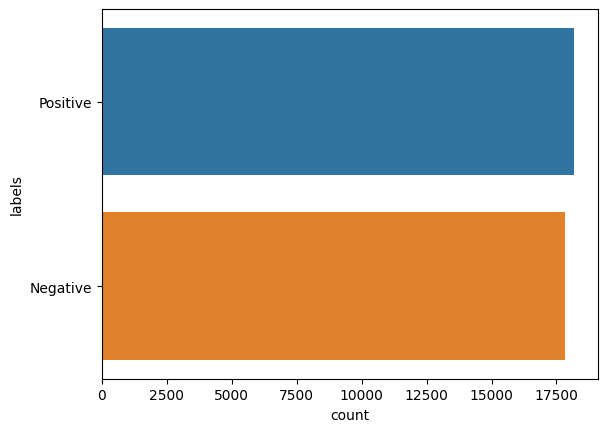

In [ ]:
import seaborn as sb
sb.countplot(y=df.labels)

In [ ]:
ascii_chars = set(string.printable)

##Remove all non-ascii values

In [ ]:
import string
@ray.remote(memory=2 * 1024 * 1024 * 1024)
def remove_non_ascii():
  for i in range(len(df)):
    for j in range(len(df['Text_data'][i])):
      ascii_chars = set(string.printable)
    return ''.join(filter(lambda x: x in ascii_chars, df['Text_data'][i][j]))

In [ ]:
rma=remove_non_ascii.remote()
rmaf=ray.get(rma)

2023-06-23 14:48:38,262	WARNING worker.py:2019 -- Warning: The remote function __main__.remove_non_ascii is very large (22 MiB). Check that its definition is not implicitly capturing a large array or other object in scope. Tip: use ray.put() to put large objects in the Ray object store.


##To Convert all the strings to lowercase

In [ ]:
for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    df['Text_data'][i][j]=df['Text_data'][i][j].lower()

In [ ]:
df.head()

,labels,Description,Text_data
0,Positive,Stuning even for the non-gamer,"[this, sound, track, was, beautiful, !, it, pa..."
1,Positive,Whispers of the Wicked Saints,"[this, was, a, easy, to, read, book, that, mad..."
2,Positive,Jobst UltraSheer Thigh High,"[excellent, product, ., however, ,, they, are,..."
3,Negative,Disappointed,"[i, read, the, reviews, ,, made, my, purchase,..."
4,Positive,Rochelle explains It All for You,"[wondering, what, the, hell, has, happened, to..."


##To remove all the Stop words from the dataset

In [ ]:
# Download the stopwords from NLTK
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
for i in range(len(df)):
  k=len(df['Text_data'][i])
  for j in range(k):
    if j<len(df['Text_data'][i]):
      if df['Text_data'][i][j] in stop_words:
        df['Text_data'][i].remove(df['Text_data'][i][j])
df.head()

,labels,Description,Text_data
0,Positive,Stuning even for the non-gamer,"[sound, track, beautiful, !, paints, senery, y..."
1,Positive,Whispers of the Wicked Saints,"[was, easy, read, book, made, want, keep, read..."
2,Positive,Jobst UltraSheer Thigh High,"[excellent, product, ., however, ,, are, diffi..."
3,Negative,Disappointed,"[read, reviews, ,, made, purchase, was, disapp..."
4,Positive,Rochelle explains It All for You,"[wondering, hell, happened, the, moral, aspect..."


##Remove the digits from the Dataset

In [ ]:
from string import digits


for i in range(len(df)):
  for j in range(len(df['Text_data'][i])):
    remove_digits = str.maketrans('', '', digits)
    res = df['Text_data'][i][j].translate(remove_digits)
    df['Text_data'][i][j]=res
df.head()

,labels,Description,Text_data
0,Positive,Stuning even for the non-gamer,"[sound, track, beautiful, !, paints, senery, y..."
1,Positive,Whispers of the Wicked Saints,"[was, easy, read, book, made, want, keep, read..."
2,Positive,Jobst UltraSheer Thigh High,"[excellent, product, ., however, ,, are, diffi..."
3,Negative,Disappointed,"[read, reviews, ,, made, purchase, was, disapp..."
4,Positive,Rochelle explains It All for You,"[wondering, hell, happened, the, moral, aspect..."
